In [200]:
import os
import re

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt

In [201]:
# %connect_info
# %qtconsole

In [225]:
%cd /Users/cgu3/Documents/Grape-Pi/data/rawdata
%pwd

/Users/cgu3/Documents/Grape-Pi/data/rawdata


'/Users/cgu3/Documents/Grape-Pi/data/rawdata'

In [203]:
# Define the regular expression
pattern = re.compile(r'.*_with_protein_probability\.csv$')

# Get a list of all files in the current directory
files = os.listdir()

# Filter the list of files to only include those that match the regular expression
matching_files = [file for file in files if pattern.match(file)]

# Print the list of matching files
print(matching_files)

['SG_combined_protein_0993_with_protein_probability.csv', 'SG_combined_protein_7105_with_protein_probability.csv', 'SG_combined_protein_7103_with_protein_probability.csv', 'SG_combined_protein_0995_with_protein_probability.csv', 'SG_combined_protein_7100_with_protein_probability.csv', 'SG_combined_protein_0981_with_protein_probability.csv', 'SG_combined_protein_0982_with_protein_probability.csv', 'SG_combined_protein_0999_with_protein_probability.csv']


In [204]:
csv_files = []
i = 0
for file in matching_files:
    if file in ['SG_combined_protein_0981_with_protein_probability.csv']:
        continue
    csv_file = pd.read_csv(file)
    csv_file.rename(columns={'protein_probability': 'protein_probability' + str(i)}, inplace=True)
    csv_files.append(csv_file)
    i += 1

In [205]:
len(csv_files)

7

In [206]:
csv_files[0].head()

,protein.Accession,protein_probability0
0,A0A024RBG1,0.999992
1,A0A075B6J2,0.939846
2,A0A075B6K0,0.991211
3,A0A075B6K2,0.331800
4,A0A075B6K4,0.469839


In [207]:
joined_file = reduce(lambda left,right: pd.merge(left,right,on='protein.Accession'), csv_files)
joined_file

,protein.Accession,protein_probability0,protein_probability1,protein_probability2,protein_probability3,protein_probability4,protein_probability5,protein_probability6
0,A0A024RBG1,0.999992,0.999766,0.000000,0.990977,0.000000,0.681366,0.999911
1,A0A075B6J2,0.939846,0.000000,0.000000,0.000000,0.000000,0.847492,0.000000
2,A0A075B6K0,0.991211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,A0A075B6K2,0.331800,0.000000,0.000000,0.000000,0.997536,0.000000,0.000000
4,A0A075B6K4,0.469839,0.000000,0.000000,0.000000,0.956788,0.000000,0.356269
...,...,...,...,...,...,...,...,...
20421,Q9UI72,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20422,Q9Y3F1,0.000000,0.748260,0.000000,0.000000,0.633704,0.000000,0.000000
20423,Q9Y6C7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.652250
20424,Q9Y6Z2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [208]:
# joined_file['max'] = joined_file.iloc[:, 1:].mean(axis=1)
joined_file['mean'] = joined_file.iloc[:, 1:].mean(axis=1)
joined_file

,protein.Accession,protein_probability0,protein_probability1,protein_probability2,protein_probability3,protein_probability4,protein_probability5,protein_probability6,mean
0,A0A024RBG1,0.999992,0.999766,0.000000,0.990977,0.000000,0.681366,0.999911,0.667430
1,A0A075B6J2,0.939846,0.000000,0.000000,0.000000,0.000000,0.847492,0.000000,0.255334
2,A0A075B6K0,0.991211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.141602
3,A0A075B6K2,0.331800,0.000000,0.000000,0.000000,0.997536,0.000000,0.000000,0.189905
4,A0A075B6K4,0.469839,0.000000,0.000000,0.000000,0.956788,0.000000,0.356269,0.254699
...,...,...,...,...,...,...,...,...,...
20421,Q9UI72,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20422,Q9Y3F1,0.000000,0.748260,0.000000,0.000000,0.633704,0.000000,0.000000,0.197423
20423,Q9Y6C7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.652250,0.093179
20424,Q9Y6Z2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [209]:
soft_label = joined_file.loc[:, ['protein.Accession', 'mean']]
soft_label.rename(columns={'mean': 'protein_probability'}, inplace=True)
soft_label

,protein.Accession,protein_probability
0,A0A024RBG1,0.667430
1,A0A075B6J2,0.255334
2,A0A075B6K0,0.141602
3,A0A075B6K2,0.189905
4,A0A075B6K4,0.254699
...,...,...
20421,Q9UI72,0.000000
20422,Q9Y3F1,0.197423
20423,Q9Y6C7,0.093179
20424,Q9Y6Z2,0.000000


<Axes: >

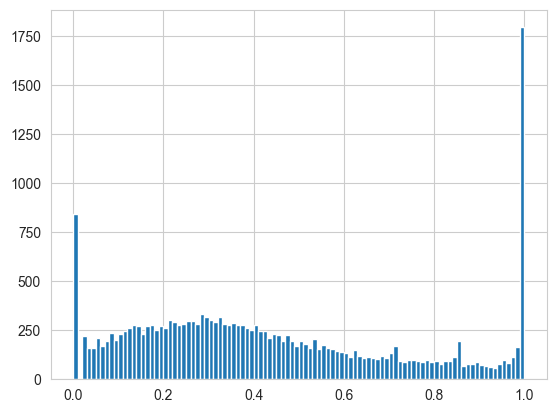

In [210]:
soft_label['protein_probability'].hist(bins=100)

In [211]:
soft_label.to_csv('soft_label.csv', index=False)

In [212]:
dat_train = pd.read_csv('SG_combined_protein_0981_with_protein_probability.csv')

<Axes: >

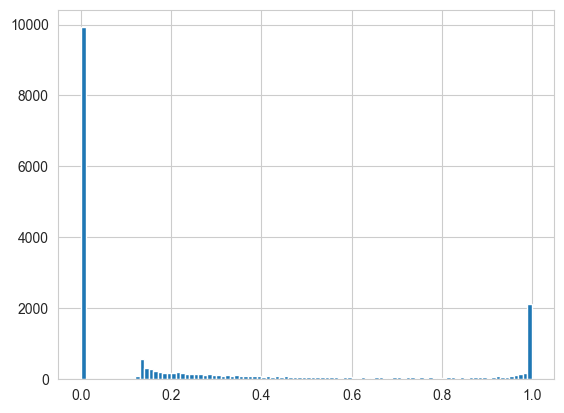

In [213]:
dat_train['protein_probability'].hist(bins=100)

In [214]:
dat_train = pd.merge(dat_train, soft_label, on='protein.Accession', suffixes=('', '_soft_label'))
dat_train

,protein.Accession,protein_probability,protein_probability_soft_label
0,A0A024RBG1,0.890032,0.667430
1,A0A075B6H7,0.700122,0.267383
2,A0A075B6H8,0.286947,0.056265
3,A0A075B6L6,0.943529,0.140940
4,A0A075B6N1,0.289680,0.153119
...,...,...,...
20421,Q9UI54,0.000000,0.000000
20422,Q9Y3F1,0.000000,0.197423
20423,Q9Y6C7,0.000000,0.093179
20424,Q9Y6Z2,0.000000,0.000000


In [215]:
# dat_train['hard_label'].value_counts()

# Merge with mRNA data

In [216]:
os.chdir('/Users/cgu3/Documents/Grape-Pi')

In [217]:
mRNA_data = pd.read_csv('data/miscellaneous/mRNA-data/processed_RNA_data.csv')
mRNA_data = mRNA_data.rename(columns={mRNA_data.columns[0]: 'gene_symbol'})
mRNA_data = mRNA_data.loc[:, ['gene_symbol', 'IP0981_1701']]
mRNA_data['IP0981_1701'] = np.log(mRNA_data['IP0981_1701'] + 1)
mRNA_data.rename(columns={'IP0981_1701': 'mRNA_TPM'}, inplace=True)
mRNA_data

,gene_symbol,mRNA_TPM
0,A1BG,0.114548
1,A1BG-AS1,0.528013
2,A1CF,1.527474
3,A2M,2.050699
4,A2M-AS1,0.619777
...,...,...
31737,ZYG11A,0.025310
31738,ZYG11B,1.230762
31739,ZYX,6.169836
31740,ZZEF1,2.066245


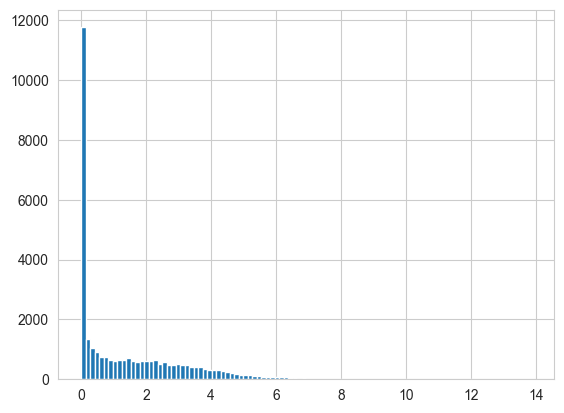

In [218]:
plt.hist(mRNA_data['mRNA_TPM'], bins=100);

In [219]:
import pandas as pd

def get_values_from_dict(keys, dictionary, na_rm=True):
    # Ensure the dictionary is a DataFrame
    dictionary = pd.DataFrame(dictionary)
    
    # Check for duplicated keys in the dictionary
    if dictionary.iloc[:, 0].duplicated().any():
        raise ValueError("Non-unique keys in dictionary: the same key can be mapped to multiple values")
    
    # Convert keys to a DataFrame
    keys_df = pd.DataFrame({'key': keys})
    
    # Join keys with the dictionary to get the corresponding values
    merged = keys_df.merge(dictionary, left_on='key', right_on=dictionary.columns[0], how='left')
    
    # Select the values column
    values = merged[dictionary.columns[1]]
    
    # If na_rm is True, remove NA values
    if na_rm:
        values = values.dropna()
    
    return values.tolist()

# Example usage:
# dictionary = {'key_column': ['a', 'b', 'c'], 'value_column': [1, 2, 3]}
# keys = ['a', 'b']
# print(get_values_from_dict(keys, dictionary))


In [220]:
acc_to_gene_symbol_dict = pd.read_table('data/miscellaneous/uniprotkb_proteome_UP000005640_AND_revi_2023_10_05.tsv', sep='\t')
acc_to_gene_symbol_dict

,Entry,Gene Names (primary),Length,Entry Name,STRING
0,A0A087X1C5,CYP2D7,515,CP2D7_HUMAN,NaN
1,A0A0B4J2F0,PIGBOS1,54,PIOS1_HUMAN,NaN
2,A0A0B4J2F2,SIK1B,783,SIK1B_HUMAN,9606.ENSP00000482829;
3,A0A0C5B5G6,MT-RNR1,16,MOTSC_HUMAN,NaN
4,A0A0K2S4Q6,CD300H,201,CD3CH_HUMAN,NaN
...,...,...,...,...,...
20406,Q9UI72,NaN,69,YE014_HUMAN,NaN
20407,Q9Y3F1,NaN,56,TA6P_HUMAN,NaN
20408,Q9Y6C7,LINC00312,94,L3R2A_HUMAN,NaN
20409,Q9Y6Z2,LINC01558,57,CF123_HUMAN,NaN


In [221]:
dat_train['gene_symbol'] = get_values_from_dict(dat_train['protein.Accession'], acc_to_gene_symbol_dict, na_rm=False)
dat_train.head()

,protein.Accession,protein_probability,protein_probability_soft_label,gene_symbol
0,A0A024RBG1,0.890032,0.667430,NUDT4B
1,A0A075B6H7,0.700122,0.267383,IGKV3-7
2,A0A075B6H8,0.286947,0.056265,IGKV1D-42
3,A0A075B6L6,0.943529,0.140940,TRBV7-3
4,A0A075B6N1,0.289680,0.153119,TRBV19


In [222]:
merged_data = pd.merge(dat_train, mRNA_data, on='gene_symbol', how='left')
merged_data.fillna(0, inplace=True)
merged_data

,protein.Accession,protein_probability,protein_probability_soft_label,gene_symbol,mRNA_TPM
0,A0A024RBG1,0.890032,0.667430,NUDT4B,0.0000
1,A0A075B6H7,0.700122,0.267383,IGKV3-7,0.0000
2,A0A075B6H8,0.286947,0.056265,IGKV1D-42,0.0000
3,A0A075B6L6,0.943529,0.140940,TRBV7-3,0.0000
4,A0A075B6N1,0.289680,0.153119,TRBV19,0.0000
...,...,...,...,...,...
20421,Q9UI54,0.000000,0.000000,0,0.0000
20422,Q9Y3F1,0.000000,0.197423,0,0.0000
20423,Q9Y6C7,0.000000,0.093179,LINC00312,0.0000
20424,Q9Y6Z2,0.000000,0.000000,LINC01558,0.0531


In [226]:
# Remove data without a hard label
merged_data['hard_label'] = np.where(merged_data['protein_probability_soft_label'] > 0.7, 1,
                                   np.where(merged_data['protein_probability_soft_label'] < 0.3, 0, -1))
merged_data['hard_label'].value_counts()
# replace -1 with 0 since the code does not support -1
merged_data['hard_label'] = np.where(merged_data['hard_label'] == -1, 0, merged_data['hard_label'])
merged_data.to_csv('gastric_all_data.csv', index=False)

hard_label
 0    7922
-1    7889
 1    4615
Name: count, dtype: int64

In [ ]:

filtered_merged_data = merged_data[merged_data['hard_label'] != -1]
# positive_limit = 0.9
# negative_limit = 0.5
# merged_data = merged_data[(merged_data['protein_probability'] > positive_limit) | (merged_data['protein_probability'] < negative_limit)]


In [ ]:
# dat_train.to_csv('0981-confident-soft-label_' + str(positive_limit) + '_' + str(negative_limit) +  '.csv', index=False)
filtered_merged_data.to_csv('0981-confident-hard-label_70_30.csv', index=False)

In [ ]:
# filtered_merged_data.to_csv('/Users/cgu3/Documents/Grape-Pi/data/rawdata/SG_combined_protein_0981_with_soft_label_and_mRNA_TPM_full.csv', index=False)
# merged_data.to_csv('/Users/cgu3/Documents/Grape-Pi/data/rawdata/single/raw/protein/protein.csv', index=False)

# Check protein graph created used by the created dataset


In [ ]:
import torch

# x = torch.tensor(merged_data.loc[:, ['protein_probability']].values, dtype=torch.float)
x = torch.tensor(merged_data.loc[:, ['protein_probability', 'mRNA_TPM']].values, dtype=torch.float)
y = torch.tensor(merged_data.loc[:, ['protein_probability_soft_label']].values, dtype=torch.float)
ids = merged_data.loc[:, ['protein.Accession']].values

In [ ]:
from graphgym.custom_graphgym.loader.protein import ProteinDataset

dataset = ProteinDataset("data/rawdata/single", numeric_columns=['protein_probability'], label_column='protein_probability_soft_label', rebuild=True)

In [ ]:
plt.subplot(3, 1, 1)
plt.hist(x[:, 0], bins=100);
plt.title('Raw protein_probability');
# 
plt.subplot(3, 1, 2)
plt.hist(x[:, 1], bins=100);
plt.title('mRNA in log2 (TPM + 1)');

plt.subplot(3, 1, 3)
plt.hist(y.squeeze(-1), bins=100);
plt.title('Target protein probability');

plt.tight_layout(pad=2.0);
plt.show();

In [ ]:
from matplotlib import pyplot as plt
from torch_geometric.utils import  degree
plt.hist(degree(dataset.edge_index[0]), bins=100)
plt.xlabel('Node degree')
plt.ylabel('Frequency')
plt.title('Distribution of protein graph node degree for PCGC dataset')
plt.grid(True);

In [179]:
degree(dataset.edge_index[0])

tensor([  0.,   0.,   0.,  ...,   0.,   0., 234.])

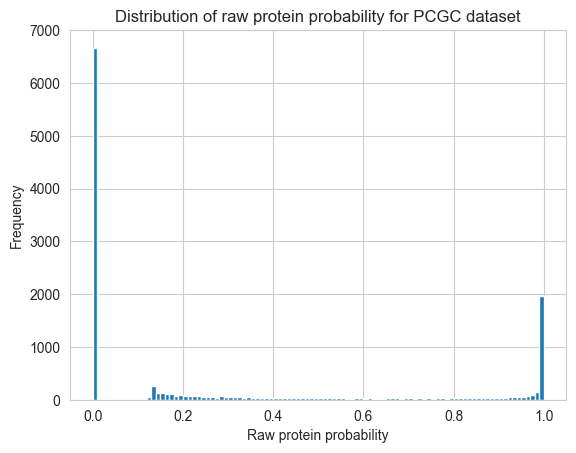

In [180]:
plt.hist(dataset.x[:, 0], bins=100)
plt.xlabel('Raw protein probability')
plt.ylabel('Frequency')
plt.title('Distribution of raw protein probability for PCGC dataset')
plt.grid(True);

In [181]:
# import networkx as nx
# import torch_geometric
# 
# g = torch_geometric.utils.to_networkx(dataset[0], to_undirected=True)
# nx.draw(g)

# Generate data with all proteins for validation on the data without a hard label

In [182]:
# all_data.to_csv('gastric_all_data.csv', index=False)
merged_all_data = pd.merge(all_data, mRNA_data, on='gene_symbol', how='left')
merged_all_data.fillna(0, inplace=True)
merged_all_data

KeyError: 'gene_symbol'